In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_context("paper", font_scale=1.6)

def fasta_reader(file):
    '''Converts .fasta to a pandas dataframe with accession as index
    and sequence in a column 'sequence'
    '''
    fasta_df = pd.read_csv(file, sep='>', lineterminator='>', header=None)
    fasta_df[['Accession', 'Sequence']] = fasta_df[0].str.split('\n', 1, \
                                        expand=True)
    fasta_df['Accession'] = fasta_df['Accession']
    fasta_df['Sequence'] = fasta_df['Sequence'].replace('\n', '', regex=True).\
                            astype(str).str.upper().replace('U', 'T')
    total_seq = fasta_df.shape[0]
    fasta_df.drop(0, axis=1, inplace=True)
    fasta_df = fasta_df[fasta_df.Sequence != '']
    fasta_df = fasta_df[fasta_df.Sequence != 'NONE']
    final_df = fasta_df.dropna()
    remained_seq = final_df.shape[0]
    if total_seq != remained_seq:
        print("{} sequences were removed due to inconsistencies in"
                      "provided file.".format(total_seq-remained_seq))
    return final_df


In [27]:
df = pd.read_pickle('uniprot_reviewed_scored_0_57.pkl.gz')
df.head(2)

,Accession,Protein,Preds
0,sp|Q99TG3|ACCA_STAAM Acetyl-coenzyme A carboxy...,MLDFEKPLFEIRNKIESLKESQDKNDVDLQEEIDMLEASLERETKK...,"[[False, False, False, False, False], 0.0, 0.0..."
1,sp|P49145|5HT1D_RABIT 5-hydroxytryptamine rece...,MSPSNQSAEGLPQEAANRSLNATGTPEAWDPGTLQALKISLAVVLS...,"[[False, False, False, False, False], 0.0, 0.5..."


In [28]:
cols = ['SP', 'Y', 'C', 'All_Cleavage', 'Fungi_Preds', 'Fungi_prob', 'Toxin_Preds', 'Toxin_prob']

df[cols] = pd.DataFrame(df.Preds.tolist(), index=df.index)

In [29]:
tox_fung = df[df['Preds'].apply(len) == 8].copy()

#Take those with 5 models returning True for toxins
probable_sp = tox_fung[tox_fung['SP'].apply(lambda x: (x == True).sum()) == 5].copy()

probable_toxins = probable_sp[probable_sp['Toxin_Preds'].apply(lambda x: (x ==True).sum()) == 5].copy()
print('Reviewed set has {} probable toxins.'.format(probable_toxins.shape[0]))
print('====\n')
print(','.join([i for i in probable_toxins.Accession.str.split('|').apply(lambda x: x[1]).values]))
print('====\n')

Reviewed set has 1045 probable toxins.
====

B0S5A7,Q8MMH0,A8HDK4,Q9NDG8,F8J2F2,P60302,P17696,Q86JG6,P84639,P83400,P13661,O73856,F5CPE4,Q53B61,P60814,P15818,Q91FS3,Q9YGI2,A8HDJ8,Q9YGH9,Q2VBP0,Q8AY56,P58370,Q9YGX1,A0A2P1BSU3,Q98957,O73857,P0DKR6,Q8AY52,P0C554,Q2VBP4,Q9YGJ0,Q8AY49,Q4LCT3,Q2ES49,C1IC50,Q2ES46,Q9W728,B5L5N4,Q9UYS2,Q75JQ0,Q6X5T2,O22415,P00991,B2KTG2,Q2ES47,H6VC05,Q9NH75,P0CI59,D1MGU1,Q6X5T3,P0C292,B1P1I5,A8Y7P1,B5L5N2,P43993,Q6X5S1,F2YLA3,P60214,Q1I163,E7CLP6,E7CLP3,P14499,O51058,B5L5N6,Q9FK10,Q9ZDB2,Q6X5T0,F8J2F3,Q1RPT0,Q2ES48,Q1RPS8,A6MFL3,B5L5N1,B5L5P4,Q54LY1,Q7YT61,Q5FZI6,Q5ZPJ7,P32223,B5L5P0,B5L5P9,B5L5P6,B5G6H1,Q869Z0,Q71RQ9,Q8AY43,Q9ZED1,Q95WD2,M4GX67,P86405,P0CI51,B5U6Y7,P0DSJ6,A7X3V4,Q6T6T5,B4ESA3,A6MFL1,P0DJ50,G9I929,B5KL30,A5X2X1,P00992,A8Y7P0,B5L5P7,B5G6H5,O35982,B4ESA2,B0VXV1,D9U2A1,Q4PRD0,P23807,Q4PRC6,Q696W1,Q557G4,B4XT03,B4XSY4,Q8AYA3,P08026,Q58768,Q4LCS8,A0A0R4I951,Q6ITB2,P0DMZ5,B4ESA4,C1IC52,I2G9B4,Q8AY46,P00989,P86870,B5G6H4,B5L5P3,Q559I8,A6LVG3,Q54ST6,P3

In [32]:
probable_sp.to_pickle('all_toxins_predicted.pkl.gz')

In [291]:
# probable_sp[probable_sp['Toxin_Preds'].apply(lambda x: (x ==True).sum()) == 4].copy()

### Uniprot ID mapping

In [56]:
df_uniprot = pd.read_csv('uniprot-yourlist M20210221A94466D2655679D1FD8953E075198DA804A364Y.tab.gz', sep='\t')
df_uniprot.columns

Index(['yourlist:M20210221A94466D2655679D1FD8953E075198DA804A364Y', 'Entry',
       'Entry name', 'Status', 'Protein names', 'Gene names', 'Organism',
       'Length', 'Signal peptide', 'Taxonomic lineage IDs', 'Date of creation',
       'Keywords', 'Taxonomic lineage (all)', 'Taxonomic lineage (FAMILY)',
       'Gene ontology (biological process)', 'Transmembrane',
       'Allergenic properties', 'Toxic dose', 'Pharmaceutical use',
       'Involvement in disease', 'Domain [CC]', 'Gene ontology (GO)',
       'Gene ontology (molecular function)', 'Protein families',
       'Taxonomic lineage (CLASS)', 'Taxonomic lineage (COHORT)',
       'Taxonomic lineage (KINGDOM)', 'Taxonomic lineage (ORDER)',
       'Taxonomic lineage (SUPERCLASS)', 'Taxonomic lineage (SUPERFAMILY)',
       'Taxonomic lineage (SUPERKINGDOM)', 'Cross-reference (Pfam)',
       'Biotechnological use', 'Motif', 'Domain [FT]',
       'Cross-reference (InterPro)', 'Cross-reference (PROSITE)',
       'Interacts with', 'Sub

In [57]:
train = pd.read_pickle('../results/toxin_nontoxin.pkl.gz')
df_uniprot = df_uniprot[df_uniprot['Entry'].apply(lambda x: x not in train.Entry.values)].copy()

In [25]:
# df_uniprot[df_uniprot['Protein families'].apply(lambda x: 'Cytochrome' in str(x))]

In [58]:
df_uniprot.shape

(910, 46)

### Remove bacteria

In [59]:

bacteria = df_uniprot[df_uniprot['Taxonomic lineage (all)'].apply(lambda x: 'Bacteria' in x)].copy()
bacteria.shape

(47, 46)

In [50]:
# bacteria

#### Remove archaea

In [60]:

archaea = df_uniprot[df_uniprot['Taxonomic lineage (all)'].apply(lambda x: 'Archaea' in x)].copy()
archaea.shape

(3, 46)

In [255]:
archaea['Protein families']

39     NaN
119    NaN
411    NaN
Name: Protein families, dtype: object

In [61]:
# filtered_ = df_uniprot[df_uniprot.Entry.apply(lambda x: x not in \
#                                               list(set(bacteria.Entry.values)) 
#                                               + list(set( archaea.Entry.values)))].copy()

filtered_ = df_uniprot[df_uniprot.Entry.apply(lambda x: x not in list(set( archaea.Entry.values)))].copy()
filtered_.shape

(907, 46)

#### Remove transmembranes

In [62]:
trans_ = filtered_[~filtered_['Transmembrane'].isna()].copy()
trans = trans_[trans_['Signal peptide'].isna()].copy()
trans

,yourlist:M20210221A94466D2655679D1FD8953E075198DA804A364Y,Entry,Entry name,Status,Protein names,Gene names,Organism,Length,Signal peptide,Taxonomic lineage IDs,...,Cross-reference (PROSITE),Interacts with,Subunit structure [CC],Subcellular location [CC],Intramembrane,Topological domain,Cross-reference (HGNC),Ensembl transcript,Sequence,Protein existence
0,B0S5A7,B0S5A7,CTL5B_DANRE,reviewed,Choline transporter-like protein 5-B (Solute c...,slc44a5b ctl5b si:dkey-267j14.1,Danio rerio (Zebrafish) (Brachydanio rerio),700,NaN,7955,...,NaN,NaN,NaN,SUBCELLULAR LOCATION: Membrane {ECO:0000250}; ...,NaN,"TOPO_DOM <1..4; /note=""Cytoplasmic""; /eviden...",NaN,NaN,GCTDVLCCVIFVIVILGYIVLGTVAWMHGDPRKVVYPTDSYGQFCG...,Inferred from homology
55,P43993,P43993,Y392_HAEIN,reviewed,Uncharacterized protein HI_0392,HI_0392,Haemophilus influenzae (strain ATCC 51907 / DS...,245,NaN,71421,...,NaN,NaN,NaN,SUBCELLULAR LOCATION: Cell membrane {ECO:00003...,NaN,NaN,NaN,NaN,MDIFFVISGFLITGIIITEIQQNSFSLKQFYTRRIKRIYPAFITVM...,Inferred from homology
63,O51058,O51058,Y027_BORBU,reviewed,Uncharacterized protein BB_0027,BB_0027,Borrelia burgdorferi (strain ATCC 35210 / B31 ...,212,NaN,224326,...,NaN,NaN,NaN,SUBCELLULAR LOCATION: Membrane {ECO:0000305}; ...,NaN,NaN,NaN,NaN,MRKYIFIILIAVLLIGVNIKKIAAAANIDRHTNSTLGIDLSVGIPI...,Predicted
66,Q9ZDB2,Q9ZDB2,Y420_RICPR,reviewed,Uncharacterized protein RP420,RP420,Rickettsia prowazekii (strain Madrid E),167,NaN,272947,...,NaN,NaN,NaN,SUBCELLULAR LOCATION: Membrane {ECO:0000305}; ...,NaN,NaN,NaN,NaN,MKKIIGLFFIIILIVINISILAYDYPKAEQEQKWDEVDSIAGEGGL...,Predicted
133,A6LVG3,A6LVG3,Y2176_CLOB8,reviewed,UPF0060 membrane protein Cbei_2176,Cbei_2176,Clostridium beijerinckii (strain ATCC 51743 / ...,111,NaN,290402,...,NaN,NaN,NaN,SUBCELLULAR LOCATION: Cell membrane {ECO:00002...,NaN,NaN,NaN,NaN,MEIIKSILYFILAGIFEIGGGYLIWIWLRDGKSYLYGVIGAVILIL...,Inferred from homology
177,P37711,P37711,VANY_ENTFC,reviewed,"D-alanyl-D-alanine carboxypeptidase (D,D-carbo...",vanY,Enterococcus faecium (Streptococcus faecium),303,NaN,1352,...,NaN,NaN,NaN,SUBCELLULAR LOCATION: Cell membrane {ECO:00002...,NaN,NaN,NaN,NaN,MKKLFFLLLLLFLIYLGYDYVNEALFSQEKVEFQNYDQNPKEHLEN...,Evidence at protein level
256,O31710,O31710,YKNX_BACSU,reviewed,Putative efflux system component YknX,yknX BSU14350,Bacillus subtilis (strain 168),377,NaN,224308,...,NaN,Itself,"SUBUNIT: Part of a complex composed of YknX, Y...",SUBCELLULAR LOCATION: Cell membrane {ECO:00002...,NaN,NaN,NaN,NaN,MKKVWIGIGIAVIVALFVGINIYRSAAPTSGSAGKEVQTGSVEENE...,Evidence at protein level
281,Q10VH5,Q10VH5,UPPP_TRIEI,reviewed,Undecaprenyl-diphosphatase (EC 3.6.1.27) (Baci...,uppP Tery_4798,Trichodesmium erythraeum (strain IMS101),312,NaN,203124,...,NaN,NaN,NaN,SUBCELLULAR LOCATION: Cell inner membrane {ECO...,NaN,NaN,NaN,NaN,MKFFCAFIFTALIFISLEKIGQSCCPNPIVDSEQLTIFQAVILGMV...,Inferred from homology
319,P0C2E2,P0C2E2,CLS_CLOPE,reviewed,Cardiolipin synthase (CL synthase) (EC 2.7.8.-),cls clsD CPE1430,Clostridium perfringens (strain 13 / Type A),476,NaN,195102,...,PS50035;,NaN,NaN,SUBCELLULAR LOCATION: Cell membrane {ECO:00002...,NaN,NaN,NaN,NaN,MHLFINMIFLINIVFIISIIFIERRNPQTTWAWILILTFLPILGFI...,Inferred from homology
473,C1KX11,C1KX11,CTAA_LISMC,reviewed,Heme A synthase (HAS) (EC 1.3.-.-) (Cytochrome...,ctaA Lm4b_02079,Listeria monocytogenes serotype 4b (strain CLI...,305,NaN,568819,...,NaN,NaN,SUBUNIT: Interacts with CtaB. {ECO:0000255|HAM...,SUBCELLULAR LOCATION: Cell membrane {ECO:00002...,NaN,NaN,NaN,NaN,MKKFLKVWSVLTIICMTVVVFGGALVTKTGSADGCGNSWPLCNGQL...,Inferred from homology


In [63]:
filtered = filtered_[filtered_['Entry'].apply(lambda x: x not in trans.Entry.values)].copy()
filtered.shape

(874, 46)

#### Remove known toxin seqs

In [64]:
# See if any from training is in the predicted sequences
# and remove them

train = pd.read_pickle('../results/toxin_nontoxin.pkl.gz')
train = train[train.Label == 1]

atp_annot = pd.read_csv('../data/uniprot/Animal_Toxin_Annotation_Project/uniprot-taxonomy Metazoa+[33208] +(keyword toxin+OR+annotation --.tab.gz',\
                       sep='\t')

toxin_kw = pd.read_csv('../data/uniprot/Toxin_Keyword/uniprot-reviewed yes+keyword Toxin+[KW-0800] .tab.gz', sep='\t')

all_train_atp_seq = set(list(train.Entry.values) + list(atp_annot.Entry.values) + list(toxin_kw.Entry.values)) 

In [65]:
train[train['Taxonomic lineage (all)'].apply(lambda x: 'Fungi' in x)]

,Entry,All,Protein,Entry name,Status,Protein names,Gene names,Organism,Length,Signal peptide,...,Cross-reference (Pfam),Biotechnological use,Motif,Domain [FT],Cross-reference (InterPro),Cross-reference (PROSITE),Cleavage,Aligned,Label,Accession
0,P67875,sp|P67875|RNMG_ASPFU Ribonuclease mitogillin O...,MVAIKNLFLLAATAVSVLAAPSPLDARATWTCINQQLNPKTNKWED...,RNMG_ASPFU,reviewed,Ribonuclease mitogillin (EC 3.1.27.-) (Allerge...,mitF aspF1 AFUA_5G02330,Neosartorya fumigata (strain ATCC MYA-4609 / A...,176,"SIGNAL 1..27; /evidence=""ECO:0000269|Ref.6""",...,NaN,NaN,NaN,NaN,IPR004025;IPR000026;IPR016191;,NaN,27.0,FLLAATAVSVLAAPSPLDARATWTCINQQLNPKTNKWEDKR,1,NaN
206,Q06153,sp|Q06153|CEUL_OPHUL Cerato-ulmin OS=Ophiostom...,MQFSIATIALFLSSAMAAPYSGNSNSDSYDPCTGLLQKSPQCCNTD...,CEUL_OPHUL,reviewed,Cerato-ulmin (CU) (Dutch elm disease toxin),CU,Ophiostoma ulmi (Dutch elm disease fungus),100,"SIGNAL 1..25; /evidence=""ECO:0000269|Ref.4""",...,PF06766;,NaN,NaN,NaN,IPR010636;IPR036686;,NaN,25.0,ATIALFLSSAMAAPYSGNSNSDSYDPCTGLLQKSPQCCNTD,1,NaN


In [66]:
len(all_train_atp_seq)

7965

In [67]:
final = filtered[filtered['Entry'].apply(lambda x: x not in all_train_atp_seq)].copy()
final.head(2)

,yourlist:M20210221A94466D2655679D1FD8953E075198DA804A364Y,Entry,Entry name,Status,Protein names,Gene names,Organism,Length,Signal peptide,Taxonomic lineage IDs,...,Cross-reference (PROSITE),Interacts with,Subunit structure [CC],Subcellular location [CC],Intramembrane,Topological domain,Cross-reference (HGNC),Ensembl transcript,Sequence,Protein existence
3,Q9NDG8,Q9NDG8,ACE4_CAEBR,reviewed,Acetylcholinesterase 4 (AChE 4) (EC 3.1.1.7),ace-4 CBG02827,Caenorhabditis briggsae,604,"SIGNAL 1..23; /evidence=""ECO:0000255""",6238,...,PS00122;PS00941;,NaN,NaN,"SUBCELLULAR LOCATION: Cell junction, synapse {...",NaN,NaN,NaN,NaN,MKPKLVFLPFLIFITVFIEESEAVHPVVLETKLGDIRGNEFFFLSK...,Evidence at transcript level
7,Q86JG6,Q86JG6,CLN5A_DICDI,reviewed,Cln5-like protein 1,cln5la DDB_G0271546,Dictyostelium discoideum (Slime mold),378,"SIGNAL 1..20; /evidence=""ECO:0000255""",44689,...,NaN,NaN,NaN,SUBCELLULAR LOCATION: Membrane {ECO:0000305}; ...,NaN,NaN,NaN,NaN,MNKIIIFILFLISILQSVRGFTDTDEIVVLYLEAPLFFSKFGTLLA...,Inferred from homology


In [68]:
df_uniprot.shape, bacteria.shape, archaea.shape, trans.shape, final.shape, 

((910, 46), (47, 46), (3, 46), (33, 46), (110, 46))

### Cluster results

In [257]:
final.shape[0], final[~final['Protein families'].isna()].shape

(110, (76, 46))

In [69]:
## Cluster results

cl = final[['Entry', 'Sequence']].copy()
cl['Entry'] = '>' + cl['Entry']
cl['Protein'] = cl['Sequence']
cl.to_csv('predicted_toxins.fa', sep='\n', index=None, header=None)

!cd-hit -i predicted_toxins.fa -o predicted_toxins_clusters.fa -n 5 -c 0.7

Program: CD-HIT, V4.8.1, Mar 01 2019, 14:14:47
Command: cd-hit -i predicted_toxins.fa -o
         predicted_toxins_clusters.fa -n 5 -c 0.7

Started: Mon Feb 22 10:59:23 2021
                            Output                              
----------------------------------------------------------------
total seq: 110
longest and shortest : 2946 and 60
Total letters: 87318
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 0M
Buffer          : 1 X 11M = 11M
Table           : 1 X 65M = 65M
Miscellaneous   : 0M
Total           : 76M

Table limit with the given memory limit:
Max number of representatives: 554377
Max number of word counting entries: 90429051

comparing sequences from          0  to        110

      110  finished        100  clusters

Approximated maximum memory consumption: 76M
writing new database
writing clustering information
program completed !

Total CPU time 0.08


In [70]:
clustered = fasta_reader('predicted_toxins_clusters.fa')
clustered.head(2)

,Accession,Sequence
0,Q9NDG8,MKPKLVFLPFLIFITVFIEESEAVHPVVLETKLGDIRGNEFFFLSK...
1,Q86JG6,MNKIIIFILFLISILQSVRGFTDTDEIVVLYLEAPLFFSKFGTLLA...


In [71]:
clustered_df = final[final.Entry.apply(lambda x: x in clustered.Accession.values)].copy()
clustered_df

,yourlist:M20210221A94466D2655679D1FD8953E075198DA804A364Y,Entry,Entry name,Status,Protein names,Gene names,Organism,Length,Signal peptide,Taxonomic lineage IDs,...,Cross-reference (PROSITE),Interacts with,Subunit structure [CC],Subcellular location [CC],Intramembrane,Topological domain,Cross-reference (HGNC),Ensembl transcript,Sequence,Protein existence
3,Q9NDG8,Q9NDG8,ACE4_CAEBR,reviewed,Acetylcholinesterase 4 (AChE 4) (EC 3.1.1.7),ace-4 CBG02827,Caenorhabditis briggsae,604,"SIGNAL 1..23; /evidence=""ECO:0000255""",6238,...,PS00122;PS00941;,NaN,NaN,"SUBCELLULAR LOCATION: Cell junction, synapse {...",NaN,NaN,NaN,NaN,MKPKLVFLPFLIFITVFIEESEAVHPVVLETKLGDIRGNEFFFLSK...,Evidence at transcript level
7,Q86JG6,Q86JG6,CLN5A_DICDI,reviewed,Cln5-like protein 1,cln5la DDB_G0271546,Dictyostelium discoideum (Slime mold),378,"SIGNAL 1..20; /evidence=""ECO:0000255""",44689,...,NaN,NaN,NaN,SUBCELLULAR LOCATION: Membrane {ECO:0000305}; ...,NaN,NaN,NaN,NaN,MNKIIIFILFLISILQSVRGFTDTDEIVVLYLEAPLFFSKFGTLLA...,Inferred from homology
8,P84639,P84639,CYVC_LEOCM,reviewed,Cycloviolin-C,NaN,Leonia cymosa (Sacha uba),30,NaN,341676,...,PS51052;PS60008;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GIPCGESCVFIPCLTTVAGCSCKNKVCYRN,Evidence at protein level
10,P13661,P13661,BLO1_ECOLX,reviewed,Beta-lactamase OXA-1 (EC 3.5.2.6) (Penicillinase),bla oxa1,Escherichia coli,276,"SIGNAL 1..25; /evidence=""ECO:0000269|PubMed:1...",562,...,PS00337;,NaN,SUBUNIT: Monomer. {ECO:0000269|PubMed:12493831}.,NaN,NaN,NaN,NaN,NaN,MKNTIHINFAIFLIIANIIYSSASASTDISTVASPLFEGTEGCFLL...,Evidence at protein level
16,Q91FS3,Q91FS3,249R_IIV6,reviewed,Uncharacterized protein 249R,IIV6-249R,Invertebrate iridescent virus 6 (IIV-6) (Chilo...,54,"SIGNAL 1..23; /evidence=""ECO:0000255""",176652,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MKELIFFLLIIVILFVVFMVVSSKQTKTFGRNEEPFLQIKNNLGWG...,Inferred from homology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,Q20A06,Q20A06,DEFH1_CRAGI,reviewed,Hemocyte defensin Cg-Defh1 (Fragment),NaN,Crassostrea gigas (Pacific oyster) (Crassostre...,60,"SIGNAL <1..17; /evidence=""ECO:0000255""",29159,...,PS51378;,NaN,NaN,SUBCELLULAR LOCATION: Secreted {ECO:0000305}. ...,NaN,NaN,NaN,NaN,LFTLVVLLMVSADMAFAGFGCPRDQYKCNSHCQSIGCRAGYCDAVT...,Evidence at transcript level
1021,P35502,P35502,ESTF_MYZPE,reviewed,Esterase FE4 (EC 3.1.1.1) (Carboxylic-ester hy...,NaN,Myzus persicae (Green peach aphid) (Aphis pers...,564,"SIGNAL 1..23; /evidence=""ECO:0000269|PubMed:8...",13164,...,PS00122;PS00941;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MKNTCGILLNLFLFIGCFLTCSASNTPKVQVHSGEIAGGFEYTYNG...,Evidence at protein level
1023,Q9NIP6,Q9NIP6,CP2B_DROME,reviewed,Cardio acceleratory peptide 2b (Capability pro...,Capa MT-CAP2b CG15520,Drosophila melanogaster (Fruit fly),151,"SIGNAL 1..21; /evidence=""ECO:0000255""",7227,...,PS00539;,NaN,NaN,SUBCELLULAR LOCATION: Secreted {ECO:0000269|Pu...,NaN,NaN,NaN,NaN,MKSMLVHIVLVIFIIAEFSTAETDHDKNRRGANMGLYAFPRVGRSD...,Evidence at protein level
1025,Q7KWW8,Q7KWW8,DIAC1_DICDI,reviewed,Probable di-N-acetylchitobiase 1 (EC 3.2.1.-),ctbs1 DDB_G0276795,Dictyostelium discoideum (Slime mold),373,"SIGNAL 1..20; /evidence=""ECO:0000255""",44689,...,PS51910;,NaN,NaN,SUBCELLULAR LOCATION: Lysosome {ECO:0000250}.,NaN,NaN,NaN,NaN,MKIFIIISLILTILIIQSKSKECPCSNVELCKPLEIGPRKEFIGFS...,Inferred from homology


In [72]:
clustered_df['Taxonomic lineage (CLASS)'].value_counts().index

Index(['Eumycetozoa', 'Magnoliopsida', 'Mammalia', 'Insecta',
       'Gammaproteobacteria', 'Chromadorea', 'Lepidosauria (lepidosaurs)',
       'Amphibia', 'Aconoidasida', 'Spirochaetia', 'Clostridia',
       'Revtraviricetes', 'Epsilonproteobacteria', 'Alphaproteobacteria',
       'Pokkesviricetes', 'Bacteroidia', 'Agaricomycetes', 'Gastropoda',
       'Actinopteri', 'Sphingobacteriia', 'Arachnida', 'Anthozoa (anthozoans)',
       'Bivalvia', 'Megaviricetes'],
      dtype='object')

In [73]:
cols = ['Taxonomic lineage (CLASS)', 'Protein families', 'Gene ontology (biological process)', \
       'Gene ontology (molecular function)']

plot_df = clustered_df[cols].copy()
# plot_df['Sort'] = plot_df['Taxonomic lineage (CLASS)'].apply(lambda x: sort_dict[str(x)])
# plot_df = plot_df.sort_values(by='Sort')
plot_df['Taxonomic lineage (CLASS)'] = plot_df['Taxonomic lineage (CLASS)'].replace({'Lepidosauria (lepidosaurs)':'Lepidosauria'})

In [74]:
plot_df['Taxonomic lineage (CLASS)'].value_counts()

Eumycetozoa              30
Magnoliopsida            12
Mammalia                  9
Insecta                   7
Gammaproteobacteria       6
Chromadorea               5
Lepidosauria              4
Aconoidasida              3
Amphibia                  3
Spirochaetia              2
Clostridia                2
Revtraviricetes           2
Epsilonproteobacteria     2
Alphaproteobacteria       2
Pokkesviricetes           1
Bacteroidia               1
Agaricomycetes            1
Gastropoda                1
Actinopteri               1
Sphingobacteriia          1
Arachnida                 1
Anthozoa (anthozoans)     1
Bivalvia                  1
Megaviricetes             1
Name: Taxonomic lineage (CLASS), dtype: int64

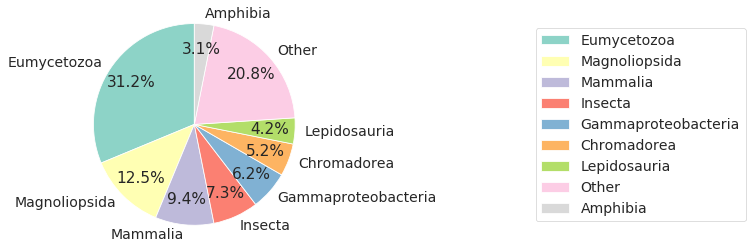

In [194]:
piechart = pd.DataFrame(plot_df['Taxonomic lineage (CLASS)'].value_counts())
piechart = piechart.reset_index()
piechart.columns = ['Taxonomic lineage (CLASS)', 'Number']
piechart

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.6)
sns.set_palette("Set3")


pc = piechart[piechart.Number >2].copy()
pc.loc[7] = ['Other', piechart[piechart.Number <=2].Number.sum()]


fig1, ax1 = plt.subplots()

pc.set_index('Taxonomic lineage (CLASS)').plot(y="Number", kind="pie", \
               counterclock=True, startangle=90, autopct='%1.1f%%', figsize=(4, 4), \
               pctdistance=0.75, labeldistance=1.1, radius=1.5, ax=ax1)
plt.legend(loc='center left', bbox_to_anchor=(2.0, 0.5))
plt.ylabel('');
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.savefig('../figs/toxins_organisms_predictions_uniprot.pdf',  bbox_inches='tight', pad_inches=0)
plt.show()

In [81]:
# plot_df['Taxonomic lineage (CLASS)'].value_counts().index
# piechart['Taxonomic lineage (CLASS)'].values
plot_df['Taxonomic lineage (CLASS)'].value_counts().index.tolist(), \
len(plot_df['Taxonomic lineage (CLASS)'].value_counts().index.tolist())

(['Eumycetozoa',
  'Magnoliopsida',
  'Mammalia',
  'Insecta',
  'Gammaproteobacteria',
  'Chromadorea',
  'Lepidosauria',
  'Aconoidasida',
  'Amphibia',
  'Spirochaetia',
  'Clostridia',
  'Revtraviricetes',
  'Epsilonproteobacteria',
  'Alphaproteobacteria',
  'Pokkesviricetes',
  'Bacteroidia',
  'Agaricomycetes',
  'Gastropoda',
  'Actinopteri',
  'Sphingobacteriia',
  'Arachnida',
  'Anthozoa (anthozoans)',
  'Bivalvia',
  'Megaviricetes'],
 24)

In [219]:
clustered_df[clustered_df['Protein families'].apply(lambda x: 'BMP' in str(x))]

,yourlist:M20210221A94466D2655679D1FD8953E075198DA804A364Y,Entry,Entry name,Status,Protein names,Gene names,Organism,Length,Signal peptide,Taxonomic lineage IDs,...,Cross-reference (PROSITE),Interacts with,Subunit structure [CC],Subcellular location [CC],Intramembrane,Topological domain,Cross-reference (HGNC),Ensembl transcript,Sequence,Protein existence
304,Q661N6,Q661N6,BMPA1_BORBP,reviewed,Basic membrane protein A1 (Immunodominant anti...,bmpA1 bmpA-1 BG0382,Borrelia bavariensis (strain ATCC BAA-2496 / D...,337,"SIGNAL 1..17; /evidence=""ECO:0000305""",290434,...,NaN,NaN,NaN,SUBCELLULAR LOCATION: Cell membrane {ECO:00003...,NaN,NaN,NaN,NaN,MNKLLLLILFECIIFLSCSGKGSLESEIPKVSLIIDGTFDDKSFNE...,Inferred from homology
791,Q86HH3,Q86HH3,GRLB_DICDI,reviewed,Metabotropic glutamate receptor-like protein B,grlB DDB_G0271686,Dictyostelium discoideum (Slime mold),755,"SIGNAL 1..23; /evidence=""ECO:0000255""",44689,...,PS50259;,NaN,NaN,SUBCELLULAR LOCATION: Membrane {ECO:0000305}; ...,NaN,"TOPO_DOM 24..385; /note=""Extracellular""; /ev...",NaN,NaN,MKNLISIILLILIFFNYSKFVKSKNCKIAVLLSGDFSDLGYNYQFN...,Evidence at transcript level
817,Q54SH7,Q54SH7,GRLC_DICDI,reviewed,Metabotropic glutamate receptor-like protein C,grlC DDB_G0282461,Dictyostelium discoideum (Slime mold),800,"SIGNAL 1..21; /evidence=""ECO:0000255""",44689,...,PS50259;,NaN,NaN,SUBCELLULAR LOCATION: Membrane {ECO:0000305}; ...,NaN,"TOPO_DOM 22..392; /note=""Extracellular""; /ev...",NaN,NaN,MKMKIIFLILILIFSINIIKCDKEFKMLTLLTAQVDDLGFNNMINQ...,Evidence at transcript level
834,Q75JP4,Q75JP4,GRLG_DICDI,reviewed,Metabotropic glutamate receptor-like protein G,grlG DDB_G0272244,Dictyostelium discoideum (Slime mold),772,"SIGNAL 1..23; /evidence=""ECO:0000255""",44689,...,PS50259;,NaN,NaN,SUBCELLULAR LOCATION: Membrane {ECO:0000305}; ...,NaN,"TOPO_DOM 24..391; /note=""Extracellular""; /ev...",NaN,NaN,MKKIIFLVLFLIFIFKDIKSSYGVDLVNFKMITLLSNNFNDLGFNN...,Evidence at transcript level
953,Q55AP3,Q55AP3,GRLO_DICDI,reviewed,Metabotropic glutamate receptor-like protein O,grlO DDB_G0271688,Dictyostelium discoideum (Slime mold),819,"SIGNAL 1..19; /evidence=""ECO:0000255""",44689,...,PS50259;,NaN,NaN,SUBCELLULAR LOCATION: Membrane {ECO:0000305}; ...,NaN,"TOPO_DOM 20..394; /note=""Extracellular""; /ev...",NaN,NaN,MKKVFFLILILNCVVGALSNKNICKISLLLSGDYNDIGVNYMFNYA...,Evidence at transcript level
1000,Q54SH8,Q54SH8,GRLH_DICDI,reviewed,Metabotropic glutamate receptor-like protein H,grlH DDB_G0282459,Dictyostelium discoideum (Slime mold),764,"SIGNAL 1..20; /evidence=""ECO:0000255""",44689,...,PS50259;,NaN,NaN,SUBCELLULAR LOCATION: Membrane {ECO:0000305}; ...,NaN,"TOPO_DOM 21..393; /note=""Extracellular""; /ev...",NaN,NaN,MKNILKILILILICINKINCLDGDGKQFRMIMLLSANVNDMGFNNM...,Evidence at transcript level


In [216]:
plot_df[plot_df['Protein families'].apply(lambda x: 'BMP' in str(x))]

,Taxonomic lineage (CLASS),Protein families,Gene ontology (biological process),Gene ontology (molecular function),Heatmap
304,Spirochaetia,BMP lipoprotein family,NaN,NaN,1
791,Eumycetozoa,BMP lipoprotein family; G-protein coupled rece...,aggregation involved in sorocarp development [...,GABA receptor activity [GO:0016917]; G protein...,1
817,Eumycetozoa,BMP lipoprotein family; G-protein coupled rece...,NaN,G protein-coupled receptor activity [GO:0004930],1
834,Eumycetozoa,BMP lipoprotein family; G-protein coupled rece...,NaN,G protein-coupled receptor activity [GO:0004930],1
953,Eumycetozoa,BMP lipoprotein family; G-protein coupled rece...,NaN,G protein-coupled receptor activity [GO:0004930],1
1000,Eumycetozoa,BMP lipoprotein family; G-protein coupled rece...,activation of GTPase activity [GO:0090630]; po...,G protein-coupled receptor activity [GO:0004930],1


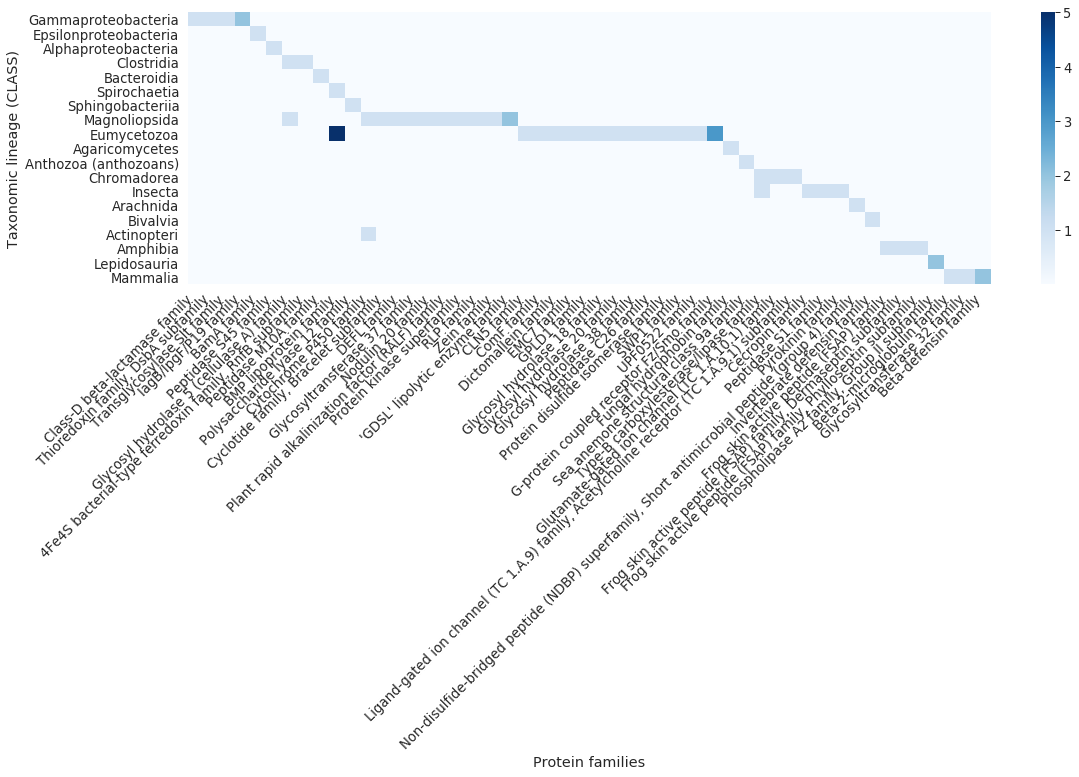

In [222]:
sns.set_context("paper", font_scale=1.5)
plt.figure(figsize=(18, 5))


sort_cols = [#'N/A',
        'Gammaproteobacteria',
    'Epsilonproteobacteria',
    'Alphaproteobacteria',
    'Clostridia',
    'Bacteroidia',
    'Spirochaetia',
    'Sphingobacteriia',
    'Magnoliopsida',
    'Eumycetozoa',
    'Agaricomycetes',
#     'Aconoidasida',
    'Anthozoa (anthozoans)',
    'Chromadorea',
    'Insecta',
    'Arachnida',
#     'Gastropoda',
    'Bivalvia',
    'Actinopteri',
    'Amphibia',
    'Lepidosauria',
    'Mammalia',
# 'Pokkesviricetes',
# 'Revtraviricetes',
# 'Megaviricetes',
]

# sort_cols = plot_df['Taxonomic lineage (CLASS)'].value_counts().index.tolist()

plot_df1 = plot_df.copy()
plot_df1['Protein families'] = plot_df1['Protein families'].apply(lambda x: str(x).split(';')[0])
plot_df1['Protein families'] = plot_df1['Protein families'].apply(lambda x: np.nan if x == 'nan' else x)

plot_df1['Heatmap'] = 1 #required for aggregation

new_df = plot_df1[['Heatmap','Protein families', 'Taxonomic lineage (CLASS)']]\
.groupby(['Protein families', 'Taxonomic lineage (CLASS)']).count().reset_index()\
.pivot_table(index='Protein families',
             columns='Taxonomic lineage (CLASS)',
             values='Heatmap')

tt = new_df.copy().sort_values(by=sort_cols, ascending=True)[sort_cols].fillna(0)

ax = sns.heatmap(tt.transpose() , cmap='Blues',  cbar_kws=dict(ticks=[1, 2, 3, 4, 5]))
plt.xticks(rotation=45, ha='right');
# ax.invert_yaxis()
plt.savefig('../figs/toxins_protein_families_predictions_uniprot.pdf',  bbox_inches='tight', pad_inches=0)

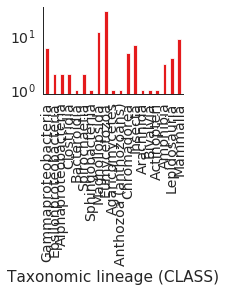

In [225]:
piechart = pd.DataFrame(plot_df['Taxonomic lineage (CLASS)'].value_counts())
piechart = piechart.reset_index()
piechart.columns = ['Taxonomic lineage (CLASS)', 'Number']

sns.set_style("white")
sns.set_context("paper", font_scale=1.6)
sns.set_palette("Set1")



ax = piechart.set_index('Taxonomic lineage (CLASS)').transpose().sort_values(by=sort_cols)[sort_cols].transpose().plot(kind='bar',\
                             legend=None, figsize=(2.5, 1.6))

# plt.xticks([])
ax.set_yscale('log')
sns.despine()
plt.savefig('../figs/toxins_protein_families_predictions_uniprot_organisms_bar.pdf',  bbox_inches='tight', pad_inches=0)

In [119]:
# clustered_df[clustered_df['Protein families'].apply(lambda x: 'u' in str(x).lower())]#['Protein names'].values
clustered_df[clustered_df['Taxonomic lineage (CLASS)'].apply(lambda x: 'bacteria' in str(x).lower())][['Protein names', 'Protein families', 'Taxonomic lineage (CLASS)']]

,Protein names,Protein families,Taxonomic lineage (CLASS)
10,Beta-lactamase OXA-1 (EC 3.5.2.6) (Penicillinase),Class-D beta-lactamase family,Gammaproteobacteria
62,X polypeptide (ORF 19) (ORF169) (P19 protein),IagB/IpgF/P19 family,Gammaproteobacteria
87,Uncharacterized protein RP012,NaN,Alphaproteobacteria
321,Thiol:disulfide interchange protein DsbA,"Thioredoxin family, DsbA subfamily",Gammaproteobacteria
371,Outer membrane protein assembly factor BamA,BamA family,Epsilonproteobacteria
468,Uncharacterized protein HI_1192,NaN,Gammaproteobacteria
506,Penicillin G acylase (EC 3.5.1.11) (Penicillin...,Peptidase S45 family,Alphaproteobacteria
534,Plasminogen-binding protein PgbB,NaN,Epsilonproteobacteria
627,Membrane-bound lytic murein transglycosylase C...,Transglycosylase Slt family,Gammaproteobacteria
940,Invasion protein IagB,IagB/IpgF/P19 family,Gammaproteobacteria


In [117]:
# clustered_df[clustered_df['Protein families'].apply(lambda x: 'u' in str(x).lower())]#['Protein names'].values
clustered_df[clustered_df['Taxonomic lineage (CLASS)'].apply(lambda x: 'vir' in str(x).lower())][['Protein names', 'Protein families', 'Taxonomic lineage (CLASS)']]

,Protein names,Protein families,Taxonomic lineage (CLASS)
16,Uncharacterized protein 249R,NaN,Megaviricetes
79,Uncharacterized protein C9,NaN,Pokkesviricetes
312,Envelope glycoprotein gp160 (Env polyprotein) ...,NaN,Revtraviricetes
1026,Envelope glycoprotein gp160 (Env polyprotein) ...,NaN,Revtraviricetes


In [118]:
tt.sum().sum()

65.0

In [252]:
for i, v in enumerate(plot_df.columns):
    print('{} {} out of total {} predicted toxins.'.format(plot_df[~plot_df[v].isna()].shape[0],\
                             v, plot_df.shape[0]))

99 Taxonomic lineage (CLASS) out of total 100 predicted toxins.
66 Protein families out of total 100 predicted toxins.
54 Gene ontology (biological process) out of total 100 predicted toxins.
59 Gene ontology (molecular function) out of total 100 predicted toxins.
100 Heatmap out of total 100 predicted toxins.


### Not in training but present in other datasets, because they dont have experimental evidence

In [120]:
# remove training set
known_tox = set(list(atp_annot[atp_annot['Taxonomic lineage (all)'].apply(lambda x: 'Eukaryota' in x)].Entry.values) + \
                list(toxin_kw[toxin_kw['Taxonomic lineage (all)'].apply(lambda x: 'Eukaryota' in x)].Entry.values)) - set(list(train.Entry.values))
len(known_tox)

7200

In [34]:
## Only SP

In [121]:
all_known_tox_df_ = pd.concat([atp_annot, toxin_kw, train]).drop_duplicates()
all_known_tox_df = all_known_tox_df_[all_known_tox_df_['Entry'].apply(lambda x: x in known_tox)]
all_known_tox_df = all_known_tox_df[~all_known_tox_df['Signal peptide'].isna()]
all_known_tox_df['Signal peptide'].apply(lambda x: '00269' in str(x)).value_counts()

False    3809
True      273
Name: Signal peptide, dtype: int64

In [122]:
all_known_tox_df

,Entry,Entry name,Status,Protein names,Gene names,Organism,Length,Signal peptide,Taxonomic lineage IDs,Date of creation,...,Motif,Domain [FT],Cross-reference (InterPro),Cross-reference (PROSITE),All,Protein,Cleavage,Aligned,Label,Accession
0,P49122,3SOF7_NAJAT,reviewed,Cytotoxin 7 (Cardiotoxin-7) (CTX7) (Ctx-7) (Ca...,NaN,Naja atra (Chinese cobra),82,"SIGNAL 1..21; /evidence=""ECO:0000255""",8656,1996-02-01,...,NaN,NaN,IPR003572;IPR003571;IPR018354;IPR035076;,PS00272;,NaN,NaN,NaN,NaN,NaN,NaN
3,P0DM60,A4A1_LOXIN,reviewed,Dermonecrotic toxin LiSicTox-alphaIVA1 (EC 4.6...,NaN,Loxosceles intermedia (Brown spider),299,"SIGNAL 1..18; /evidence=""ECO:0000255""",58218,2013-10-16,...,NaN,NaN,IPR017946;,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Q9PW56,BNP2_BOTJA,reviewed,Bradykinin-potentiating and C-type natriuretic...,NaN,Bothrops jararaca (Jararaca) (Bothrops jajaraca),265,"SIGNAL 1..23; /evidence=""ECO:0000255""",8724,2006-10-03,...,NaN,NaN,IPR000663;IPR030480;,PS00263;,NaN,NaN,NaN,NaN,NaN,NaN
16,P0CAQ4,CA11A_CONAH,reviewed,Alpha-conotoxin-like Ac1.1a,NaN,Conus achatinus (Little frog cone),64,"SIGNAL 1..21; /evidence=""ECO:0000255""",369967,2009-06-16,...,NaN,NaN,IPR009958;,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,P0CAQ5,CA11B_CONAH,reviewed,Alpha-conotoxin-like Ac1.1b,NaN,Conus achatinus (Little frog cone),64,"SIGNAL 1..21; /evidence=""ECO:0000255""",369967,2009-06-16,...,NaN,NaN,IPR009958;IPR018072;,PS60014;,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6301,Q9ZQX0,ALB1_GLYSO,reviewed,Albumin-1 (A1) [Cleaved into: Albumin-1 chain ...,NaN,Glycine soja (Wild soybean),119,"SIGNAL 1..19; /evidence=""ECO:0000255""",3848,2001-06-20,...,NaN,NaN,IPR012512;IPR032000;,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6303,Q39837,ALB1_SOYBN,reviewed,Albumin-1 (A1) [Cleaved into: Albumin-1 chain ...,NaN,Glycine max (Soybean) (Glycine hispida),119,SIGNAL 1..19,3847,2001-06-20,...,NaN,NaN,IPR012512;IPR032000;,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6575,O22415,SNAIF_SAMNI,reviewed,Ribosome-inactivating protein SNAIf (Agglutini...,SNA-If LECSNA-If SNAIf,Sambucus nigra (European elder),570,"SIGNAL 1..28; /evidence=""ECO:0000250|UniProtK...",4202,2016-11-02,...,NaN,"DOMAIN 319..439; /note=""Ricin B-type lectin 1...",IPR036041;IPR017989;IPR001574;IPR017988;IPR016...,PS50231;PS00275;,NaN,NaN,NaN,NaN,NaN,NaN
7031,P32032,THN2_WHEAT,reviewed,Alpha-2-purothionin [Cleaved into: Alpha-2-pur...,THI1.2 PUR-B1,Triticum aestivum (Wheat),136,SIGNAL 1..27,4565,1993-07-01,...,NaN,NaN,IPR001010;IPR036391;,PS00271;,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
# These were identified as highly probable toxins

known_identified = df_uniprot[df_uniprot['Entry'].apply(lambda x: x in known_tox)].copy()
known_identified.shape, known_identified[~known_identified['Signal peptide'].isna()].shape

((759, 46), (759, 46))

In [124]:
known_identified[known_identified['Signal peptide'].apply(lambda x: 'ECO:0000269' not in str(x))]

,yourlist:M20210221A94466D2655679D1FD8953E075198DA804A364Y,Entry,Entry name,Status,Protein names,Gene names,Organism,Length,Signal peptide,Taxonomic lineage IDs,...,Cross-reference (PROSITE),Interacts with,Subunit structure [CC],Subcellular location [CC],Intramembrane,Topological domain,Cross-reference (HGNC),Ensembl transcript,Sequence,Protein existence
2,A8HDK4,A8HDK4,3L21_TROCA,reviewed,Long neurotoxin 1 (LNTX-1),NaN,Tropidechis carinatus (Australian rough-scaled...,93,"SIGNAL 1..21; /evidence=""ECO:0000250""",100989,...,PS00272;,NaN,NaN,SUBCELLULAR LOCATION: Secreted {ECO:0000250}.,NaN,NaN,NaN,NaN,MKTLLLTLVVVTIVCLDLGNSFSCYKTPHVKSEPCAPGQNLCYTKT...,Inferred from homology
4,F8J2F2,F8J2F2,3L220_DRYCN,reviewed,Long neurotoxin 20 (LNTX-20) (Long neurotoxin ...,NaN,Drysdalia coronoides (White-lipped snake) (Hop...,88,"SIGNAL 1..21; /evidence=""ECO:0000250""",66186,...,PS00272;,NaN,NaN,SUBCELLULAR LOCATION: Secreted {ECO:0000269|Pu...,NaN,NaN,NaN,NaN,MKTLLLTLVVVTIVCLDLGNSFSCYKTPYVKSEPCAPGENLCYTKS...,Evidence at protein level
6,P17696,P17696,3SIYL_DENAN,reviewed,Synergistic-like venom protein,NaN,Dendroaspis angusticeps (Eastern green mamba) ...,86,"SIGNAL 1..21; /evidence=""ECO:0000255""",8618,...,PS00272;,NaN,NaN,SUBCELLULAR LOCATION: Secreted {ECO:0000250}.,NaN,NaN,NaN,NaN,MKTLLLTLVVVTIVCLDLGYTLTCVTGKSIGGISTEECAAGQKICF...,Inferred from homology
13,Q53B61,Q53B61,3NO2_OPHHA,reviewed,Weak neurotoxin OH-72 (Fragment),NaN,Ophiophagus hannah (King cobra) (Naja hannah),81,"SIGNAL <1..16; /evidence=""ECO:0000255""",8665,...,PS00272;,NaN,NaN,SUBCELLULAR LOCATION: Secreted {ECO:0000250}.,NaN,NaN,NaN,NaN,LTLVVVTIVCLDLGYTLTCLICPEEYCKRIHTCRDGENVCFKGFYE...,Evidence at transcript level
14,P60814,P60814,3NO2I_NAJAT,reviewed,Probable weak neurotoxin NNAM2I,NaN,Naja atra (Chinese cobra),86,"SIGNAL 1..21; /evidence=""ECO:0000250""",8656,...,PS00272;,NaN,NaN,SUBCELLULAR LOCATION: Secreted {ECO:0000250|Un...,NaN,NaN,NaN,NaN,MKTLPLTLVVVTIVCLDLGYTLTCLNCPEMFCGKFQICRNGEKICF...,Inferred from homology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,Q8AY50,Q8AY50,3NO22_BUNCA,reviewed,Weak toxin 2,NaN,Bungarus candidus (Malayan krait),86,"SIGNAL 1..23; /evidence=""ECO:0000255""",92438,...,PS00272;,NaN,NaN,SUBCELLULAR LOCATION: Secreted {ECO:0000250}.,NaN,NaN,NaN,NaN,MKTLLLTLVVVAIVCLDLGYTLTCLICPEKDCQKVHTCRNEEKICV...,Inferred from homology
1038,Q9W717,Q9W717,3SO1_NAJAT,reviewed,Neurotoxin-like protein NTL2,NaN,Naja atra (Chinese cobra),86,"SIGNAL 1..21; /evidence=""ECO:0000250""",8656,...,PS00272;,NaN,NaN,SUBCELLULAR LOCATION: Secreted {ECO:0000250}.,NaN,NaN,NaN,NaN,MKTLLLSLVVVTIVCLDLGYTRLCLSDYSIFSETIEICPDGHNFCF...,Inferred from homology
1040,U3EPL2,U3EPL2,3SX_MICFL,reviewed,Three-finger toxin 3b (3FTx 3b),NaN,Micrurus fulvius (Eastern coral snake) (Colube...,84,"SIGNAL 1..21; /evidence=""ECO:0000255""",8637,...,NaN,NaN,NaN,SUBCELLULAR LOCATION: Secreted {ECO:0000305|Pu...,NaN,NaN,NaN,NaN,MKTLLLTLVVVTIVCLDLGNSLKCYSSRTETMTCPEGEDKCEKYAA...,Evidence at protein level
1041,A7X4R0,A7X4R0,3L2O2_OXYMI,reviewed,Long neurotoxin 3FTx-Oxy2,NaN,Oxyuranus microlepidotus (Inland taipan) (Diem...,92,"SIGNAL 1..21; /evidence=""ECO:0000250""",111177,...,PS00272;,NaN,NaN,SUBCELLULAR LOCATION: Secreted {ECO:0000250}.,NaN,NaN,NaN,NaN,MKTLLLTLVVVTIVCLDLGYTRRCFTTPSVRSERCPPGQEVCYTKT...,Inferred from homology


In [253]:
known_identified.shape

(759, 48)

In [125]:
# for i in [3, 4, 5]:
#     ptx = probable_sp[probable_sp['Toxin_Preds'].apply(lambda x: (x ==True).sum()) == i]
#     ptx = ptx['Accession'].apply(lambda x: x.split('|')[1] in all_toxins_sp_euk).copy()
#     print('For {} positive predictions: {} toxins identified.'.format(i, ptx.shape[0]))

In [126]:
known_identified['Heatmap'] = 1

In [127]:
known_identified['Protein fam.'] = known_identified['Protein families'].apply(lambda x: np.nan if str(x) == 'nan' else str(x).split(', ')[0])
known_identified['Protein fam.'].value_counts()

Snake three-finger toxin family                     209
Phospholipase A2 family                             145
Snaclec family                                       98
Long (4 C-C) scorpion toxin superfamily              86
Venom Kunitz-type family                             64
Short scorpion toxin superfamily                     31
Non-disulfide-bridged peptide (NDBP) superfamily     25
Snake waprin family                                  22
Long (3 C-C) scorpion toxin superfamily              14
True venom lectin family                             13
Conotoxin O1 superfamily                              6
Conotoxin I2 superfamily                              6
Ribosome-inactivating protein family                  4
Scolopendra neurotoxin 3 family                       4
Long chain scorpion toxin family                      3
Scoloptoxin-03 family                                 2
Neurotoxin 03 (Tx2) family                            2
Scoloptoxin-10 family                           

In [128]:
known_identified[known_identified['Protein families'].apply(lambda x: 'SLPTX' in str(x))]

,yourlist:M20210221A94466D2655679D1FD8953E075198DA804A364Y,Entry,Entry name,Status,Protein names,Gene names,Organism,Length,Signal peptide,Taxonomic lineage IDs,...,Subunit structure [CC],Subcellular location [CC],Intramembrane,Topological domain,Cross-reference (HGNC),Ensembl transcript,Sequence,Protein existence,Heatmap,Protein fam.
453,V5N6J4,V5N6J4,TXF2A_SCOSU,reviewed,U-scoloptoxin(15)-Ssm2a (U-SLPTX(15)-Ssm2a) (S...,NaN,Scolopendra subspinipes (Vietnamese centipede),78,"SIGNAL 1..23; /evidence=""ECO:0000255""",55038,...,NaN,SUBCELLULAR LOCATION: Secreted {ECO:0000305|Re...,NaN,NaN,NaN,NaN,MEKKIIFLCFFVSLLTLPEFISSQVLVEDDVPFPEKKFADRGECIR...,Inferred from homology,1,SLPTX(15) family


In [129]:
known_identified['Taxonomic lineage (CLASS)'].value_counts()

Lepidosauria (lepidosaurs)    552
Arachnida                     170
Chilopoda (centipedes)         16
Gastropoda                     12
Magnoliopsida                   4
Insecta                         3
Anthozoa (anthozoans)           2
Name: Taxonomic lineage (CLASS), dtype: int64

In [149]:
new_df.columns

Index(['Anthozoa (anthozoans)', 'Arachnida', 'Chilopoda (centipedes)',
       'Gastropoda', 'Insecta', 'Lepidosauria (lepidosaurs)', 'Magnoliopsida'],
      dtype='object', name='Taxonomic lineage (CLASS)')

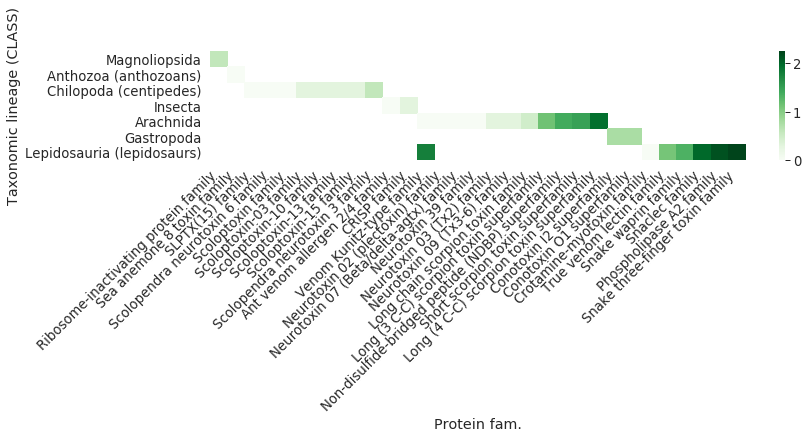

In [203]:
sns.set_context("paper", font_scale=1.5)
plt.figure(figsize=(12, 2))


# sort_cols = [#'N/A',
# #     'Caudoviricetes',

#     'Magnoliopsida',
# #     'Eumycetozoa',
# #     'Agaricomycetes',
# #     'Chromadorea',
#         'Anthozoa (anthozoans)',
#     'Chilopoda (centipedes)',
#     'Insecta',
#     'Arachnida',
#     'Gastropoda',
# #     'Bivalvia',

# #     'Actinopteri',
# #     'Amphibia',
#     'Lepidosauria (lepidosaurs)',
# #     'Mammalia',
# ]

sort_cols = [#'N/A',
#         'Gammaproteobacteria',
#     'Epsilonproteobacteria',
#     'Alphaproteobacteria',
#     'Clostridia',
#     'Bacteroidia',
#     'Spirochaetia',
#     'Sphingobacteriia',
    'Magnoliopsida',
#     'Eumycetozoa',
#     'Agaricomycetes',
#     'Aconoidasida',
    'Anthozoa (anthozoans)',
        'Chilopoda (centipedes)',
#     'Chromadorea',
    'Insecta',
    'Arachnida',

    'Gastropoda',
#     'Bivalvia',
#     'Actinopteri',
#     'Amphibia',
    'Lepidosauria (lepidosaurs)',
#     'Mammalia',
# 'Pokkesviricetes',
# 'Revtraviricetes',
# 'Megaviricetes',
]




new_df = known_identified[['Heatmap','Protein fam.', 'Taxonomic lineage (CLASS)']]\
.groupby(['Protein fam.', 'Taxonomic lineage (CLASS)']).count().reset_index()\
.pivot_table(index='Protein fam.',
             columns='Taxonomic lineage (CLASS)',
             values='Heatmap')
try:
    
    tt = new_df.copy().sort_values(by=sort_cols, ascending=True)[sort_cols].fillna(0)

    # log_norm = LogNorm(vmin=tt.min().min(), vmax=tt.max().max())
    # cbar_ticks = [math.pow(10, i) for i in range(math.floor(math.log10(tt.min().min())), 1+math.ceil(tt.log10(tt.max().max())))]

    tt = tt.replace(0, np.nan)



    ax = sns.heatmap(np.log10(tt.transpose()) , cmap='Greens', vmax=2.25, vmin=0)
    # plt.xticks(rotation=45, ha='right');
    # ax.invert_yaxis()
    # plt.savefig('../figs/known_toxins_protein_families_no_rotation.pdf',  bbox_inches='tight', pad_inches=0)
    plt.xticks(rotation=45, ha='right');
    # ax.invert_yaxis()
    plt.savefig('../figs/known_toxins_protein_families.pdf',  bbox_inches='tight', pad_inches=0)
except Exception as exp:
    print(str(exp))

In [204]:
## Known identified with domains
tt.sum().sum()

753.0

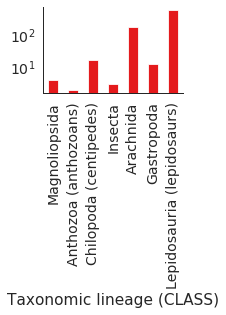

In [205]:
piechart = pd.DataFrame(known_identified['Taxonomic lineage (CLASS)'].value_counts())
piechart = piechart.reset_index()
piechart.columns = ['Taxonomic lineage (CLASS)', 'Number']
piechart

sns.set_style("white")
sns.set_context("paper", font_scale=1.6)
sns.set_palette("Set1")

# sort_cols = [#'N/A',
# #     'Caudoviricetes',

#     'Magnoliopsida',
# #     'Eumycetozoa',
# #     'Agaricomycetes',
# #     'Chromadorea',
#         'Anthozoa (anthozoans)',
#     'Chilopoda (centipedes)',
#     'Insecta',
#     'Arachnida',
#     'Gastropoda',
# #     'Bivalvia',

# #     'Actinopteri',
# #     'Amphibia',
#     'Lepidosauria (lepidosaurs)',
# #     'Mammalia',
# ]



pc = piechart[piechart.Number >1].copy()
# pc.loc[7] = ['Other', piechart[piechart.Number <=1].Number.sum()]
# pc['Number'] = np.log10(pc['Number'])

ax = piechart.set_index('Taxonomic lineage (CLASS)').transpose().sort_values(by=sort_cols)[sort_cols].transpose().plot(kind='bar',\
                             legend=None, figsize=(2.5, 1.6))

# plt.xticks([])
ax.set_yscale('log')
sns.despine()

plt.savefig('../figs/known_toxins_organisms_bar.pdf',  bbox_inches='tight', pad_inches=0)

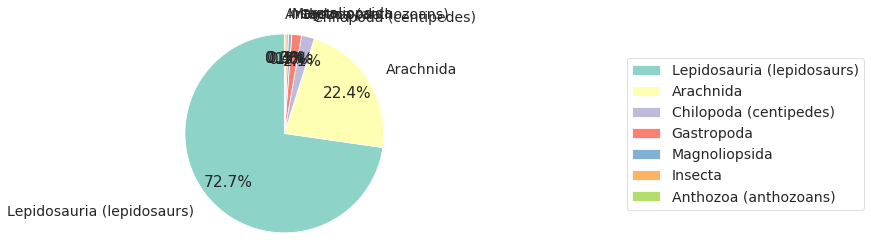

In [158]:
piechart = pd.DataFrame(known_identified['Taxonomic lineage (CLASS)'].value_counts())
piechart = piechart.reset_index()
piechart.columns = ['Taxonomic lineage (CLASS)', 'Number']
piechart

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.6)
sns.set_palette("Set3")


pc = piechart[piechart.Number >1].copy()
pc.loc[7] = ['Other', piechart[piechart.Number <=1].Number.sum()]


fig1, ax1 = plt.subplots()

pc.set_index('Taxonomic lineage (CLASS)').plot(y="Number", kind="pie", \
               counterclock=True, startangle=90, autopct='%1.1f%%', figsize=(4, 4), \
               pctdistance=0.75, labeldistance=1.2, radius=1.8, ax=ax1)
plt.legend(loc='center left', bbox_to_anchor=(2.0, 0.5))
plt.ylabel('');
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.savefig('../figs/known_toxins_organisms.pdf',  bbox_inches='tight', pad_inches=0)

plt.show()

In [159]:
pc['Percent'] = pc['Number'] * 100 / pc['Number'].sum()
pc

,Taxonomic lineage (CLASS),Number,Percent
0,Lepidosauria (lepidosaurs),552,72.727273
1,Arachnida,170,22.397892
2,Chilopoda (centipedes),16,2.108037
3,Gastropoda,12,1.581028
4,Magnoliopsida,4,0.527009
5,Insecta,3,0.395257
6,Anthozoa (anthozoans),2,0.263505
7,Other,0,0.000000


#### GO annotation

In [160]:
clustered_df[clustered_df['Taxonomic lineage (CLASS)'] == 'Revtraviricetes']

,yourlist:M20210221A94466D2655679D1FD8953E075198DA804A364Y,Entry,Entry name,Status,Protein names,Gene names,Organism,Length,Signal peptide,Taxonomic lineage IDs,...,Cross-reference (PROSITE),Interacts with,Subunit structure [CC],Subcellular location [CC],Intramembrane,Topological domain,Cross-reference (HGNC),Ensembl transcript,Sequence,Protein existence
312,P27977,P27977,ENV_SIVVG,reviewed,Envelope glycoprotein gp160 (Env polyprotein) ...,env,Simian immunodeficiency virus agm.vervet (isol...,877,"SIGNAL 1..19; /evidence=""ECO:0000255""",11730,...,NaN,NaN,SUBUNIT: [Surface protein gp120]: The mature e...,SUBCELLULAR LOCATION: [Transmembrane protein g...,NaN,"TOPO_DOM 20..707; /note=""Extracellular""; /ev...",NaN,NaN,MKLTLLIGILLIGIGVVLNTRQQWVTVFYGVPVWKNSSVQAFCMTP...,Inferred from homology
1026,Q8AIH5,Q8AIH5,ENV_SIVTN,reviewed,Envelope glycoprotein gp160 (Env polyprotein) ...,NaN,Simian immunodeficiency virus (isolate TAN1) (...,871,"SIGNAL 1..21; /evidence=""ECO:0000255""",388910,...,NaN,NaN,SUBUNIT: [Surface protein gp120]: The mature e...,SUBCELLULAR LOCATION: [Transmembrane protein g...,NaN,"TOPO_DOM 22..684; /note=""Extracellular""; /ev...",NaN,NaN,MKNLIGITLILIITILGIGFSTYYTTVFYGVPVWKEAQPTLFCASD...,Inferred from homology


In [178]:
test1 = plot_df[['Gene ontology (biological process)','Protein families', 'Taxonomic lineage (CLASS)']].copy()
test1['Gene ontology (biological process)'] = test1['Gene ontology (biological process)'].str.split('; ')
test1 = test1.explode(column='Gene ontology (biological process)')

test1['Heatmap'] = 1
new_df1 = test1[['Gene ontology (biological process)','Heatmap', 'Taxonomic lineage (CLASS)']]\
.groupby(['Gene ontology (biological process)', 'Taxonomic lineage (CLASS)']).count().reset_index()\
.pivot_table(index='Gene ontology (biological process)',
             columns='Taxonomic lineage (CLASS)',
             values='Heatmap')
new_df1.columns

Index(['Aconoidasida', 'Actinopteri', 'Alphaproteobacteria', 'Amphibia',
       'Arachnida', 'Bacteroidia', 'Bivalvia', 'Chromadorea', 'Clostridia',
       'Epsilonproteobacteria', 'Eumycetozoa', 'Gammaproteobacteria',
       'Insecta', 'Lepidosauria', 'Magnoliopsida', 'Mammalia',
       'Revtraviricetes', 'Sphingobacteriia'],
      dtype='object', name='Taxonomic lineage (CLASS)')

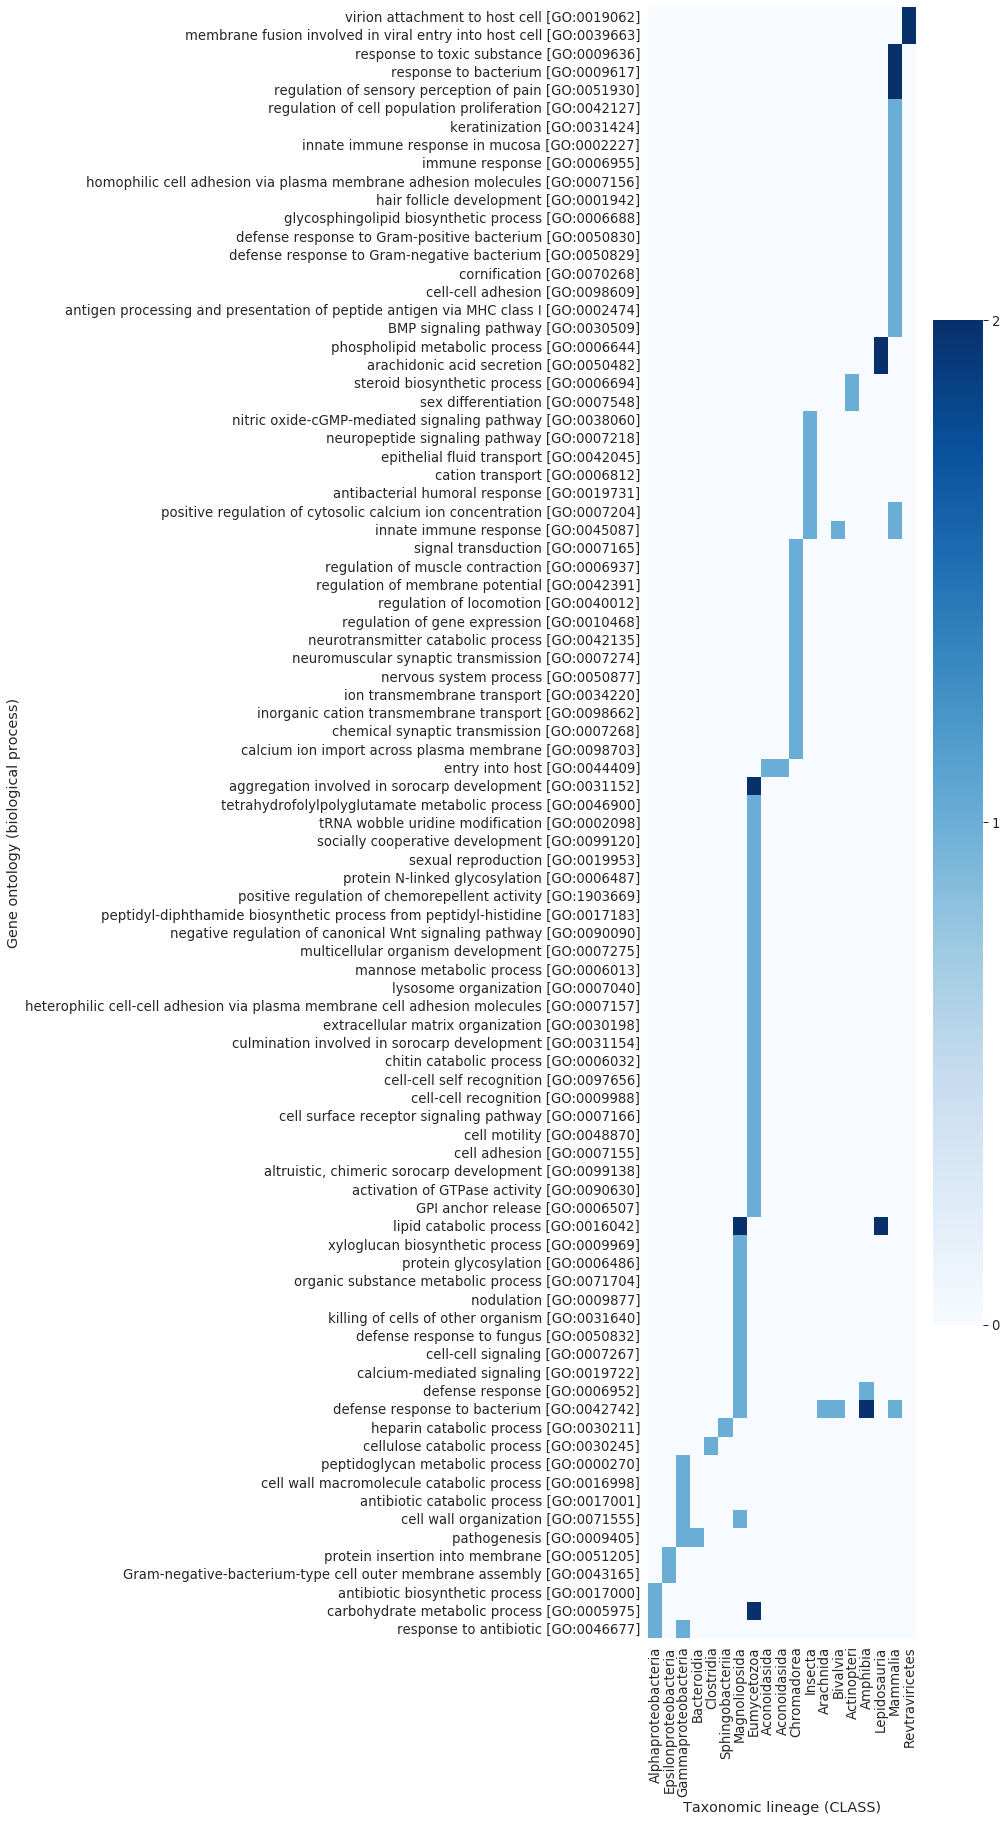

In [226]:
test1 = plot_df[['Gene ontology (biological process)','Protein families', 'Taxonomic lineage (CLASS)']].copy()
test1['Gene ontology (biological process)'] = test1['Gene ontology (biological process)'].str.split('; ')
test1 = test1.explode(column='Gene ontology (biological process)')

test1['Heatmap'] = 1
new_df1 = test1[['Gene ontology (biological process)','Heatmap', 'Taxonomic lineage (CLASS)']]\
.groupby(['Gene ontology (biological process)', 'Taxonomic lineage (CLASS)']).count().reset_index()\
.pivot_table(index='Gene ontology (biological process)',
             columns='Taxonomic lineage (CLASS)',
             values='Heatmap')


sort_cols = [#'N/A',
    'Alphaproteobacteria',
    'Epsilonproteobacteria',
    'Gammaproteobacteria',
    'Bacteroidia',
    'Clostridia',
    'Sphingobacteriia',
    
#     'Pokkesviricetes',
    
    
#  'Megaviricetes',
#  'Insthoviricetes',
 
#  'Pinopsida',
 'Magnoliopsida',
    'Eumycetozoa',
#     'Agaricomycetes',
#  'Saccharomycetes',
#  'Sordariomycetes',
 'Aconoidasida',
    'Aconoidasida',
 'Chromadorea',
 'Insecta',
    'Arachnida',
#  'Gastropoda',
    'Bivalvia',
#     'Anthozoa (anthozoans)',
 'Actinopteri',
 'Amphibia',
 'Lepidosauria',
 'Mammalia',
    'Revtraviricetes',

]

# sort_cols = new_df1.columns.tolist()

sns.set_context("paper", font_scale=1.5)
plt.figure(figsize=(6, 30))

ax = sns.heatmap(new_df1.sort_values(by=sort_cols, ascending=True)[sort_cols].fillna(0), cmap='Blues', \
                cbar_kws=dict(ticks=[0, 1, 2]))
ax.invert_yaxis()
plt.savefig('../figs/toxins_GO_(biological_process).pdf',  bbox_inches='tight', pad_inches=0)

In [234]:
new_df1[new_df1.index =='pathogenesis [GO:0009405]']

Taxonomic lineage (CLASS),Aconoidasida,Actinopteri,Alphaproteobacteria,Amphibia,Arachnida,Bacteroidia,Bivalvia,Chromadorea,Clostridia,Epsilonproteobacteria,Eumycetozoa,Gammaproteobacteria,Insecta,Lepidosauria,Magnoliopsida,Mammalia,Revtraviricetes,Sphingobacteriia
Gene ontology (biological process),,,,,,,,,,,,,,,,,,
pathogenesis [GO:0009405],NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [241]:
plot_df[plot_df['Taxonomic lineage (CLASS)'].apply(lambda x: 'bact' in str(x).lower())]

,Taxonomic lineage (CLASS),Protein families,Gene ontology (biological process),Gene ontology (molecular function),Heatmap
10,Gammaproteobacteria,Class-D beta-lactamase family,antibiotic catabolic process [GO:0017001]; res...,beta-lactamase activity [GO:0008800]; penicill...,1
62,Gammaproteobacteria,IagB/IpgF/P19 family,NaN,NaN,1
87,Alphaproteobacteria,NaN,carbohydrate metabolic process [GO:0005975],catalytic activity [GO:0003824],1
321,Gammaproteobacteria,"Thioredoxin family, DsbA subfamily",NaN,oxidoreductase activity [GO:0016491],1
371,Epsilonproteobacteria,BamA family,Gram-negative-bacterium-type cell outer membra...,NaN,1
468,Gammaproteobacteria,NaN,NaN,NaN,1
506,Alphaproteobacteria,Peptidase S45 family,antibiotic biosynthetic process [GO:0017000]; ...,metal ion binding [GO:0046872]; penicillin ami...,1
534,Epsilonproteobacteria,NaN,NaN,NaN,1
619,Bacteroidia,Peptidase M10A family,pathogenesis [GO:0009405],metalloendopeptidase activity [GO:0004222]; zi...,1
627,Gammaproteobacteria,Transglycosylase Slt family,cell wall macromolecule catabolic process [GO:...,"hydrolase activity, acting on glycosyl bonds [...",1


In [197]:
print('{} sequences out of {} have annotated GO biological process.'.format(clustered_df.shape[0] - len(clustered_df[clustered_df['Gene ontology (biological process)'].isna()]['Entry'].values), clustered_df.shape[0]))

54 sequences out of 100 have annotated GO biological process.


In [167]:
test1 = plot_df[['Gene ontology (molecular function)','Protein families', 'Taxonomic lineage (CLASS)']].copy()
test1['Gene ontology (molecular function)'] = test1['Gene ontology (molecular function)'].str.split('; ')
test1 = test1.explode(column='Gene ontology (molecular function)')

test1['Heatmap'] = 1
new_df1 = test1[['Gene ontology (molecular function)','Heatmap', 'Taxonomic lineage (CLASS)']]\
.groupby(['Gene ontology (molecular function)', 'Taxonomic lineage (CLASS)']).count().reset_index()\
.pivot_table(index='Gene ontology (molecular function)',
             columns='Taxonomic lineage (CLASS)',
             values='Heatmap')
new_df1.columns

Index(['Actinopteri', 'Agaricomycetes', 'Alphaproteobacteria', 'Bacteroidia',
       'Bivalvia', 'Chromadorea', 'Clostridia', 'Eumycetozoa',
       'Gammaproteobacteria', 'Gastropoda', 'Insecta', 'Lepidosauria',
       'Magnoliopsida', 'Mammalia', 'Revtraviricetes', 'Sphingobacteriia'],
      dtype='object', name='Taxonomic lineage (CLASS)')

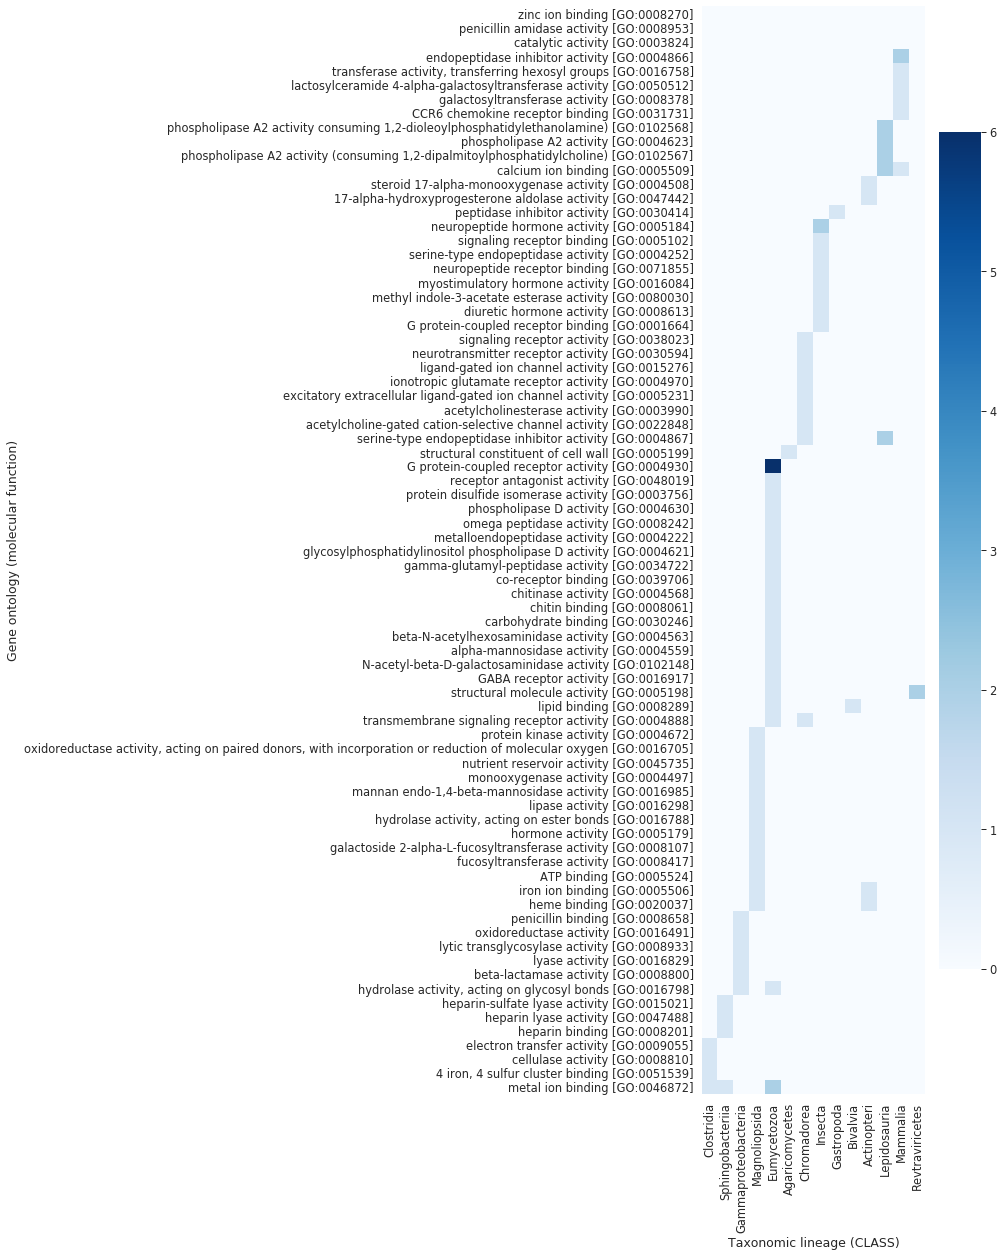

In [202]:
test1 = plot_df[['Gene ontology (molecular function)','Protein families', 'Taxonomic lineage (CLASS)']].copy()
test1['Gene ontology (molecular function)'] = test1['Gene ontology (molecular function)'].str.split('; ')
test1 = test1.explode(column='Gene ontology (molecular function)')

test1['Heatmap'] = 1
new_df1 = test1[['Gene ontology (molecular function)','Heatmap', 'Taxonomic lineage (CLASS)']]\
.groupby(['Gene ontology (molecular function)', 'Taxonomic lineage (CLASS)']).count().reset_index()\
.pivot_table(index='Gene ontology (molecular function)',
             columns='Taxonomic lineage (CLASS)',
             values='Heatmap')


sort_cols = [#'N/A',
    'Clostridia',
    'Sphingobacteriia',
'Gammaproteobacteria',
#     'Pokkesviricetes',
    
    
#  'Megaviricetes',
#  'Insthoviricetes',
 
#  'Pinopsida',
 'Magnoliopsida',
    'Eumycetozoa',
    'Agaricomycetes',
#  'Saccharomycetes',
#  'Sordariomycetes',
#  'Aconoidasida',
#     'Aconoidasida',
 'Chromadorea',
 'Insecta',
#     'Arachnida',
 'Gastropoda',
    'Bivalvia',
#     'Anthozoa (anthozoans)',
 'Actinopteri',
#  'Amphibia',
 'Lepidosauria',
 'Mammalia',
    'Revtraviricetes',
]


# sort_cols = new_df1.columns.tolist()

sns.set_context("paper", font_scale=1.3)
plt.figure(figsize=(5, 20))

ax = sns.heatmap(new_df1.sort_values(by=sort_cols, ascending=True)[sort_cols].fillna(0), cmap='Blues')
ax.invert_yaxis()
plt.savefig('../figs/toxins_GO_(molecular function).pdf',  bbox_inches='tight', pad_inches=0)

In [198]:
print('{} sequences out of {} have annotated GO molecular function.'.format(clustered_df.shape[0] - len(clustered_df[clustered_df['Gene ontology (molecular function)'].isna()]['Entry'].values), clustered_df.shape[0]))

59 sequences out of 100 have annotated GO molecular function.


#### Total known toxins and identified toxins

In [171]:
tox_fung['Entry'] = tox_fung['Accession'].str.split('|').apply(lambda x: x[1])

In [172]:
all_known_tox_df

,Entry,Entry name,Status,Protein names,Gene names,Organism,Length,Signal peptide,Taxonomic lineage IDs,Date of creation,...,Motif,Domain [FT],Cross-reference (InterPro),Cross-reference (PROSITE),All,Protein,Cleavage,Aligned,Label,Accession
0,P49122,3SOF7_NAJAT,reviewed,Cytotoxin 7 (Cardiotoxin-7) (CTX7) (Ctx-7) (Ca...,NaN,Naja atra (Chinese cobra),82,"SIGNAL 1..21; /evidence=""ECO:0000255""",8656,1996-02-01,...,NaN,NaN,IPR003572;IPR003571;IPR018354;IPR035076;,PS00272;,NaN,NaN,NaN,NaN,NaN,NaN
3,P0DM60,A4A1_LOXIN,reviewed,Dermonecrotic toxin LiSicTox-alphaIVA1 (EC 4.6...,NaN,Loxosceles intermedia (Brown spider),299,"SIGNAL 1..18; /evidence=""ECO:0000255""",58218,2013-10-16,...,NaN,NaN,IPR017946;,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Q9PW56,BNP2_BOTJA,reviewed,Bradykinin-potentiating and C-type natriuretic...,NaN,Bothrops jararaca (Jararaca) (Bothrops jajaraca),265,"SIGNAL 1..23; /evidence=""ECO:0000255""",8724,2006-10-03,...,NaN,NaN,IPR000663;IPR030480;,PS00263;,NaN,NaN,NaN,NaN,NaN,NaN
16,P0CAQ4,CA11A_CONAH,reviewed,Alpha-conotoxin-like Ac1.1a,NaN,Conus achatinus (Little frog cone),64,"SIGNAL 1..21; /evidence=""ECO:0000255""",369967,2009-06-16,...,NaN,NaN,IPR009958;,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,P0CAQ5,CA11B_CONAH,reviewed,Alpha-conotoxin-like Ac1.1b,NaN,Conus achatinus (Little frog cone),64,"SIGNAL 1..21; /evidence=""ECO:0000255""",369967,2009-06-16,...,NaN,NaN,IPR009958;IPR018072;,PS60014;,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6301,Q9ZQX0,ALB1_GLYSO,reviewed,Albumin-1 (A1) [Cleaved into: Albumin-1 chain ...,NaN,Glycine soja (Wild soybean),119,"SIGNAL 1..19; /evidence=""ECO:0000255""",3848,2001-06-20,...,NaN,NaN,IPR012512;IPR032000;,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6303,Q39837,ALB1_SOYBN,reviewed,Albumin-1 (A1) [Cleaved into: Albumin-1 chain ...,NaN,Glycine max (Soybean) (Glycine hispida),119,SIGNAL 1..19,3847,2001-06-20,...,NaN,NaN,IPR012512;IPR032000;,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6575,O22415,SNAIF_SAMNI,reviewed,Ribosome-inactivating protein SNAIf (Agglutini...,SNA-If LECSNA-If SNAIf,Sambucus nigra (European elder),570,"SIGNAL 1..28; /evidence=""ECO:0000250|UniProtK...",4202,2016-11-02,...,NaN,"DOMAIN 319..439; /note=""Ricin B-type lectin 1...",IPR036041;IPR017989;IPR001574;IPR017988;IPR016...,PS50231;PS00275;,NaN,NaN,NaN,NaN,NaN,NaN
7031,P32032,THN2_WHEAT,reviewed,Alpha-2-purothionin [Cleaved into: Alpha-2-pur...,THI1.2 PUR-B1,Triticum aestivum (Wheat),136,SIGNAL 1..27,4565,1993-07-01,...,NaN,NaN,IPR001010;IPR036391;,PS00271;,NaN,NaN,NaN,NaN,NaN,NaN


#### These were identified by us but are toxins from bacteriophages

In [173]:
# pd.concat([final, known_identified, df_uniprot]).drop_duplicates()
set(df_uniprot.Entry.values) - set(list(final.Entry.values) + list(known_identified.Entry.values)\
                                  +list(bacteria.Entry.values) + list(archaea.Entry.values) + list(trans.Entry.values))

{'P08026', 'P10149', 'Q779K4'}

In [174]:
df_uniprot[df_uniprot.Entry.apply(lambda x: x in {'P08026', 'P10149', 'Q779K4'})]['Taxonomic lineage (all)'].values

array(['Viruses, Duplodnaviria, Heunggongvirae, Uroviricota, Caudoviricetes, Caudovirales, Siphoviridae (phages with long non-contractile tails), Lambdavirus, unclassified Lambdavirus, Enterobacteria phage H19B (Bacteriophage H19B)',
       'Viruses, Duplodnaviria, Heunggongvirae, Uroviricota, Caudoviricetes, Caudovirales, Podoviridae (phages with short tails), Sepvirinae, Traversvirus, unclassified Traversvirus, Shigella phage 7888 (Shigella sonnei bacteriophage 7888)',
       'Viruses, unclassified viruses, unclassified bacterial viruses, Bacteriophage H30'],
      dtype=object)

In [175]:
all_iden = []

# remove training seq

count_dfs = tox_fung[tox_fung.Entry.apply(lambda x: x not in train.Entry.values)]

for i in [1, 2, 3, 4, 5]:
    sp_ = count_dfs[count_dfs['SP'].apply(lambda x: (x == True).sum()) == i].copy()
    for j in [1, 2, 3, 4, 5]:
        tox_ = sp_[sp_['Toxin_Preds'].apply(lambda x: (x ==True).sum()) == j].copy()
        t = tox_[tox_.Entry.apply(lambda x: x in all_known_tox_df.Entry.values)]
        print("For {}* SP, toxins identified with {}* = {}".format(i, j, t.shape[0]))
        all_iden.append(t.shape[0])
    print('\n===\n')

print('Total predicted toxins = {} out of {} annotated toxins.'.format(np.sum(all_iden), len(all_known_tox_df)))

For 1* SP, toxins identified with 1* = 0
For 1* SP, toxins identified with 2* = 0
For 1* SP, toxins identified with 3* = 0
For 1* SP, toxins identified with 4* = 0
For 1* SP, toxins identified with 5* = 1

===

For 2* SP, toxins identified with 1* = 0
For 2* SP, toxins identified with 2* = 1
For 2* SP, toxins identified with 3* = 0
For 2* SP, toxins identified with 4* = 0
For 2* SP, toxins identified with 5* = 5

===

For 3* SP, toxins identified with 1* = 2
For 3* SP, toxins identified with 2* = 1
For 3* SP, toxins identified with 3* = 1
For 3* SP, toxins identified with 4* = 0
For 3* SP, toxins identified with 5* = 0

===

For 4* SP, toxins identified with 1* = 3
For 4* SP, toxins identified with 2* = 1
For 4* SP, toxins identified with 3* = 0
For 4* SP, toxins identified with 4* = 5
For 4* SP, toxins identified with 5* = 6

===

For 5* SP, toxins identified with 1* = 134
For 5* SP, toxins identified with 2* = 97
For 5* SP, toxins identified with 3* = 58
For 5* SP, toxins identified 

In [176]:
all_iden = pd.DataFrame(columns=['SP', 'Toxin', 'Counts'], index=np.arange(1, 26))
# Index = SP
# Col = toxin

idx = 1
for i in [1, 2, 3, 4, 5]:
    sp_ = tox_fung[tox_fung['SP'].apply(lambda x: (x == True).sum()) == i].copy()
    for j in [1, 2, 3, 4, 5]:
        tox_ = sp_[sp_['Toxin_Preds'].apply(lambda x: (x ==True).sum()) == j].copy()
        t = tox_[tox_.Entry.apply(lambda x: x in all_known_tox_df.Entry.values)]
        all_iden.loc[idx] = [i, j, t.shape[0]]# np.log10()]
        idx += 1
all_iden


,SP,Toxin,Counts
1,1,1,0
2,1,2,0
3,1,3,0
4,1,4,0
5,1,5,1
6,2,1,0
7,2,2,1
8,2,3,0
9,2,4,0
10,2,5,5


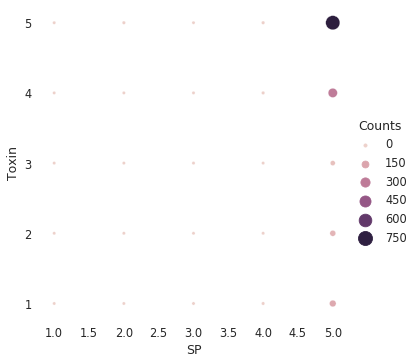

In [177]:
# all_iden['Log(Counts)'] = all_iden[['Counts']].astype(int).apply(np.log10)

sns.set_style('white')




g = sns.relplot(
    data=all_iden,
    x="SP", y="Toxin",
     size="Counts", hue="Counts",
#     palette=cmap, 
    sizes=(10, 200),
)

# g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True);
g.ax.set_yticklabels(['', 1, '', 2, '', 3, '', 4, '', 5]);

# plt.savefig('../figs/Identified_toxins_counts.pdf',  bbox_inches='tight', pad_inches=0)